# 🏦 Bina.az

In [1145]:
#Let's import library
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import warnings as wg

In [1146]:
#Firstly , let's  ignore warnings
wg.filterwarnings('ignore')

## 👨🏻‍💻 Let's pull information from the site

In [1147]:
# Make a request to the website
url = 'https://bina.az/baki/alqi-satqi/menziller'  # Replace with the URL of the website you want to scrape
response = requests.get(url)

In [1148]:
# Create a BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

In [1149]:
# Find elements by tag name
title = soup.find('title')  # Find the <title> tag
print('Title:', title.text)

Title: Mənzil almaq, Bakı - bina.az


In [1150]:
# Find elements by class name
paragraphs = soup.find_all(class_='paragraph')  # Find all elements with class="paragraph"
for paragraph in paragraphs:
    print('Paragraph:', paragraph.text)

In [1151]:
my_soup = BeautifulSoup(response.content)
my_soup.prettify()

'<!DOCTYPE html>\n<html lang="az">\n <head>\n  <title>\n   Mənzil almaq, Bakı - bina.az\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="Azərbaycanda pulsuz daşınmaz əmlak elanları - bina.az. Mənzil almaq, Bakı kateqoriyasında bütün elanlar" name="description"/>\n  <link href="https://bina.azstatic.com/assets/favicons/favicon-192x192-b40ea6169e17d157d4e6943453ee0f32374348b53abc40010d2ff8c81a2263ec.png" rel="apple-touch-icon" sizes="192x192"/>\n  <link href="https://bina.azstatic.com/assets/favicons/favicon-192x192-b40ea6169e17d157d4e6943453ee0f32374348b53abc40010d2ff8c81a2263ec.png" rel="icon" sizes="192x192" type="image/png"/>\n  <link color="#ad7a5b" href="https://bina.azstatic.com/assets/favicons/favicon-1ab62f7406b1ea314f39c7b9fd7b516ab347f4db183a5f861c26bfbc32a0b13d.svg" rel="mask-icon"/>\n  <meta content="#ad7a5b" name="theme-color"/>\n  <meta content="https://bina.azstatic.com/assets/browserconfig-2f989834e19db5e3b590c5044f73fbdef0acb8831c4058b7bda75944955a2210.xml" name

In [1152]:
linkler = my_soup.find_all('div', class_='card_params')

In [1153]:
# Create an empty DataFrame
df = pd.DataFrame(columns=['Location', 'Price', 'Currency'])

for i in linkler:
    location = i.find(class_='location').text
    price = i.find(class_='price-val').text
    currency = i.find(class_='price-cur').text
    area = i.find(class_='name').find_all('li')[1].text
    room = i.find(class_='name').find('li').text
    floor = i.find(class_='name').find_all('li')
    if len(floor) >= 3:
        third_li = floor[2]
        print(third_li.text)
    else:
        print('null')
        
    # Append the extracted values to the DataFrame
    df = df.append({'Location': location, 'Price': price, 'Currency': currency, 'Area': area,'Room':room,'Floor':floor}, ignore_index=True)

10/15 mərtəbə
12/20 mərtəbə
16/20 mərtəbə
2/16 mərtəbə
null
null
null
null
3/20 mərtəbə
15/18 mərtəbə
1/19 mərtəbə
3/12 mərtəbə
7/13 mərtəbə
6/6 mərtəbə
4/17 mərtəbə
4/5 mərtəbə
4/9 mərtəbə
15/19 mərtəbə
5/9 mərtəbə
3/12 mərtəbə
12/13 mərtəbə
17/23 mərtəbə
10/10 mərtəbə
4/15 mərtəbə
11/17 mərtəbə
3/18 mərtəbə
8/16 mərtəbə
15/18 mərtəbə
10/12 mərtəbə
3/5 mərtəbə
15/17 mərtəbə
11/20 mərtəbə


In [1158]:
# Create an empty DataFrame
df = pd.DataFrame(columns=['Location', 'Price', 'Currency', 'Area', 'Room', 'Floor'])
df

,Location,Price,Currency,Area,Room,Floor


In [1159]:
for i in range(70):
        url = f'https://bina.az/baki/alqi-satqi/menziller?page={i}'  # Replace with the URL of the website you want to scrape
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        my_soup = BeautifulSoup(response.content)
        linkler = my_soup.find_all('div', class_='card_params')
        for i in linkler:
            location = i.find(class_='location').text
            price = i.find(class_='price-val').text
            currency = i.find(class_='price-cur').text
            area = i.find(class_='name').find_all('li')[1].text
            room = i.find(class_='name').find('li').text
            floor = i.find(class_='name').find_all('li')
            if len(floor) >= 3:
                third_li = floor[2]


            # Append the extracted values to the DataFrame
            df = df.append({'Location': location, 'Price': price, 'Currency': currency, 'Area': area, 'Room': room, 'Floor': third_li.text if len(floor) >= 3 else 'null'}, ignore_index=True)

In [1160]:
#Let's look at length of data frame
len(df)

2240

# 🛒 If we want to get more data, we can change the range in the for loop.  

In [1161]:
# Let's examine null values
df.isnull().sum()

Location    0
Price       0
Currency    0
Area        0
Room        0
Floor       0
dtype: int64

In [1162]:
df['Floor'].replace('null',np.nan , inplace = True)

In [1163]:
# Let's examine null values
df.isnull().sum()

Location      0
Price         0
Currency      0
Area          0
Room          0
Floor       302
dtype: int64

In [1164]:
#Let's remove null values
df.dropna(inplace = True)
len(df)

1938

In [1165]:
#Let's examine column number of unique
df.nunique()

Location     62
Price       458
Currency      1
Area        330
Room         11
Floor       257
dtype: int64

In [1166]:
#Let's remove the Currency column from the data frame because it has one unique value
del df['Currency']

# 📍 Let's correct data type of columns

In [1167]:
#Let's start from Price column
df['Price'] = df['Price'].str.replace(',', '').str.replace(' ', '').astype(int)

In [1168]:
df['Area'] = df['Area'].apply(lambda value: re.sub(r'[^0-9]','',value)) 

In [1169]:
df['Area'] = df['Area'].astype('int')

In [1170]:
df['Room'] = df['Room'].apply(lambda value: re.sub(r'[^0-9]','',value)) 
df['Room'] = df['Room'].astype('int')

# 💡 ✔Let's think about how we separate the floor column?
## · I want to find ratio floor : 10/14 --> 10/14 = 0.71.
## · Because the higher the ratio, the lower the price.
## · But this may change depending on the situation.
## · Therefore, let's divide it into separate columns.
## · Let's write both of them and find the better one as a correlation.

In [1171]:
df['Floor'] = df['Floor'].apply(lambda value: re.sub(r'[^0-9/]','',value)) 

In [1172]:
df['Floor'] = df['Floor'].str.split('/')

In [920]:
df['Floor_current'] = [x[0] for x in df['Floor']]
df['Floor_common'] = [x[1] for x in df['Floor']]

In [921]:
#Let's remove floor column from data fram
del df['Floor']

In [922]:
df['Floor_current'] = df['Floor_current'].astype('int')
df['Floor_common'] = df['Floor_common'].astype('int')

In [923]:
df.dtypes

Location         object
Price             int32
Area              int32
Room              int32
Floor_current     int32
Floor_common      int32
dtype: object

In [924]:
#Let's look at Location column
df['Location'].nunique()

72

In [925]:
df['Location'].value_counts()
for i in df['Location'].unique():
    if (df[df['Location'] == i]['Location'].value_counts() < 40)[0]:
        df.loc[df['Location'] == i, 'Location'] = 'Others'

In [926]:
df['Location'].value_counts()

Others                   572
Nəsimi r.                135
Nəriman Nərimanov m.     128
Şah İsmayıl Xətai m.     120
İnşaatçılar m.           119
Nərimanov r.             115
Memar Əcəmi m.           113
28 May m.                 86
Həzi Aslanov m.           81
Elmlər Akademiyası m.     74
Nizami m.                 72
Qara Qarayev m.           64
8 Noyabr m.               57
20 Yanvar m.              55
Neftçilər m.              46
Azadlıq Prospekti m.      46
Əhmədli m.                43
Xətai r.                  42
Name: Location, dtype: int64

# 🚫 Remove Outlier

In [1103]:
df1 = df.copy()

In [1104]:
for i in df1.select_dtypes('int').columns:
    mean = df1[i].mean()
    std = df1[i].std()
    below_outlier = mean - 3*std
    above_outlier = mean + 3*std
    df1 = df1[(df1[i] > below_outlier) & (df1[i] < above_outlier)]

In [1105]:
for i in df1.select_dtypes('int').columns:
    if i != 'Price':
        df1[i] = (df1[i] - df1[i].min()) / (df1[i].max() - df1[i].min())

In [1106]:
df1.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_3232\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Price,Area,Room,Floor_current,Floor_common
Price,1.000000,0.214989,0.646973,0.172614,0.315755
Area,0.214989,1.000000,0.134963,0.081692,0.112417
Room,0.646973,0.134963,1.000000,0.091431,0.154848
Floor_current,0.172614,0.081692,0.091431,1.000000,0.634313
Floor_common,0.315755,0.112417,0.154848,0.634313,1.000000


In [1107]:
#Let's use 'get_dummies' for Location column
df1 = pd.get_dummies(df1, columns=['Location'], prefix='', prefix_sep='')

# ⚠ Preparation for modeling

In [1108]:
#Let's determine target value
#Target value --> Price
#Let's examine correlation
df1.corr()['Price'][1:]

Area                     0.214989
Room                     0.646973
Floor_current            0.172614
Floor_common             0.315755
20 Yanvar m.            -0.077529
28 May m.                0.185947
8 Noyabr m.              0.020079
Azadlıq Prospekti m.    -0.014047
Elmlər Akademiyası m.    0.131349
Həzi Aslanov m.         -0.089711
Memar Əcəmi m.          -0.166328
Neftçilər m.            -0.072547
Nizami m.                0.078765
Nəriman Nərimanov m.     0.057441
Nərimanov r.             0.074348
Nəsimi r.                0.208934
Others                  -0.146706
Qara Qarayev m.         -0.076672
Xətai r.                -0.021196
İnşaatçılar m.          -0.071977
Şah İsmayıl Xətai m.     0.147581
Əhmədli m.              -0.087101
Name: Price, dtype: float64

<Axes: >

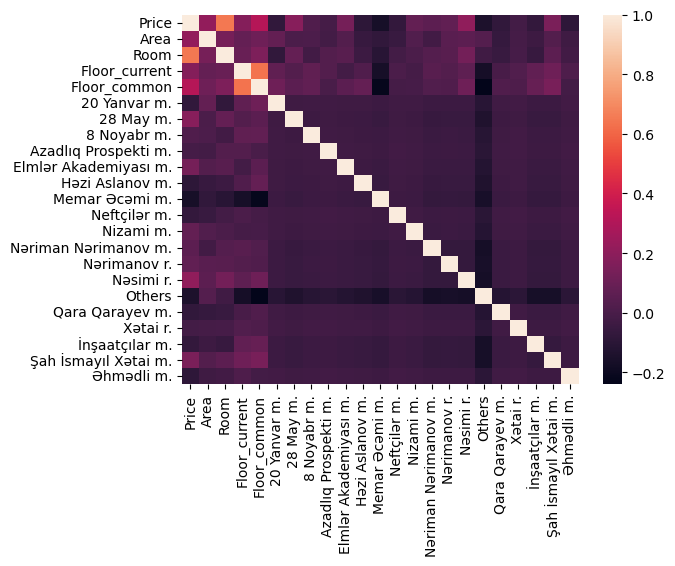

In [1109]:
#Let's create heatmap for correlation
sns.heatmap(df1.corr())

In [1110]:
#Let's build a model
ln = LinearRegression()

In [1111]:
y = df1['Price']
X = df1.drop('Price' , axis = 1)

In [1112]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [1113]:
ln.fit(X_train , y_train)

LinearRegression()

In [1114]:
y_pred = ln.predict(X_test)

In [1115]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"R2 Score: {r2} \nMean Absolute Error: {mae} \nMean Squared Error: {msq} \nMean Absolute Percentage Error: {mape}")

R2 Score: 0.5190925366880754 
Mean Absolute Error: 58923.80700530867 
Mean Squared Error: 67069.86525046396 
Mean Absolute Percentage Error: 0.2836679427511259


# 📌 Adding Columns

In [1116]:
df2 = df1.copy()

In [1117]:
for a in df2.columns:
    for b in df2.columns:
        if a > b and a != 'Price' and b != 'Price':
            new_col_name = a + '+' + b
            df1[new_col_name] = df1[a] + df1[b]
            corr = df1[[new_col_name, 'Price']].corr().loc[new_col_name, 'Price']
            if np.abs(corr) < 0.20:
                del df1[new_col_name]

In [1118]:
# Keep only columns with correlation greater than 0.2 or less than -0.2
correlations = df1.corr()['Price']
selected_columns = correlations[np.abs(correlations < 0.3)].index

In [1119]:
for i in selected_columns:
    del df1[i]

In [1120]:
df1.corr()['Price']

Price                                 1.000000
Room                                  0.646973
Floor_common                          0.315755
Room+Area                             0.620709
Room+Floor_current                    0.533678
Room+Floor_common                     0.632830
Room+20 Yanvar m.                     0.480730
Room+28 May m.                        0.572595
Room+8 Noyabr m.                      0.521389
Room+Azadlıq Prospekti m.             0.505614
Room+Elmlər Akademiyası m.            0.561846
Room+Həzi Aslanov m.                  0.414797
Room+Memar Əcəmi m.                   0.322855
Room+Neftçilər m.                     0.482587
Room+Nizami m.                        0.544909
Room+Nəriman Nərimanov m.             0.454037
Room+Nərimanov r.                     0.474609
Room+Nəsimi r.                        0.546932
Room+Qara Qarayev m.                  0.455929
Floor_common+Area                     0.363637
Floor_common+28 May m.                0.347671
Floor_common+

In [1121]:
y = df1['Price']
X = df1.drop('Price' , axis = 1)

In [1122]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state = 42 , test_size = 0.2)

In [1123]:
ln.fit(X_train,y_train)

LinearRegression()

In [1124]:
y_pred = ln.predict(X_test)

In [1125]:
r2 = r2_score(y_test,y_pred)
r2

0.5215542685105254

# 📌 Logarithm

In [1126]:
df1 = df2.copy() 

In [1127]:
for a in ['Area','Room','Floor_current','Floor_common']:
    new_col = a + "_log"
    df1[new_col] = np.log1p(df1[a])
    df1[new_col] = df1[new_col].replace(np.inf, 0)
    corr = df1[[new_col, 'Price']].corr().loc[new_col, 'Price']
    if np.abs(corr) < 0.20:
        del df1[new_col]

In [1128]:
df1.corr()['Price']

Price                    1.000000
Area                     0.214989
Room                     0.646973
Floor_current            0.172614
Floor_common             0.315755
20 Yanvar m.            -0.077529
28 May m.                0.185947
8 Noyabr m.              0.020079
Azadlıq Prospekti m.    -0.014047
Elmlər Akademiyası m.    0.131349
Həzi Aslanov m.         -0.089711
Memar Əcəmi m.          -0.166328
Neftçilər m.            -0.072547
Nizami m.                0.078765
Nəriman Nərimanov m.     0.057441
Nərimanov r.             0.074348
Nəsimi r.                0.208934
Others                  -0.146706
Qara Qarayev m.         -0.076672
Xətai r.                -0.021196
İnşaatçılar m.          -0.071977
Şah İsmayıl Xətai m.     0.147581
Əhmədli m.              -0.087101
Area_log                 0.270621
Room_log                 0.629905
Floor_common_log         0.315015
Name: Price, dtype: float64

In [1129]:
y = df1['Price']
X = df1.drop('Price' , axis = 1)

In [1130]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state = 42 , test_size = 0.2)

In [1131]:
ln.fit(X_train,y_train)

LinearRegression()

In [1132]:
y_pred = ln.predict(X_test)

In [1133]:
r2 = r2_score(y_test,y_pred)
r2

0.5842207690187682

# 📌 Squared

In [1134]:
df1 = df2.copy()

In [1135]:
for a in ['Area','Room']:
    new_col = a + "_pow2"
    df1[new_col] = df1[a]*df1[a]
    corr = df1[[new_col, 'Price']].corr().loc[new_col, 'Price']
    if np.abs(corr) < 0.20:
        del df1[new_col]

In [1136]:
df1.corr()['Price']

Price                    1.000000
Area                     0.214989
Room                     0.646973
Floor_current            0.172614
Floor_common             0.315755
20 Yanvar m.            -0.077529
28 May m.                0.185947
8 Noyabr m.              0.020079
Azadlıq Prospekti m.    -0.014047
Elmlər Akademiyası m.    0.131349
Həzi Aslanov m.         -0.089711
Memar Əcəmi m.          -0.166328
Neftçilər m.            -0.072547
Nizami m.                0.078765
Nəriman Nərimanov m.     0.057441
Nərimanov r.             0.074348
Nəsimi r.                0.208934
Others                  -0.146706
Qara Qarayev m.         -0.076672
Xətai r.                -0.021196
İnşaatçılar m.          -0.071977
Şah İsmayıl Xətai m.     0.147581
Əhmədli m.              -0.087101
Room_pow2                0.657356
Name: Price, dtype: float64

In [1137]:
y = df1['Price']
X = df1.drop('Price' , axis = 1)

In [1138]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state = 42 , test_size = 0.2)

In [1139]:
ln.fit(X_train,y_train)

LinearRegression()

In [1140]:
y_pred = ln.predict(X_test)

In [1141]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"R2 Score: {r2} \nMean Absolute Error: {mae} \nMean Squared Error: {msq} \nMean Absolute Percentage Error: {mape}")

R2 Score: 0.5638315957415553 
Mean Absolute Error: 56039.60008773504 
Mean Squared Error: 67069.86525046396 
Mean Absolute Percentage Error: 0.26445942238242653


# 📌 The End 